### Notebook to identify and visualise gene markers for Epithelial cells 

- **Developed by:** Carlos Talavera-López Ph.D
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- v230706

### Import required modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from bioservices import KEGG
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 9.4.0
appdirs             1.4.4
appnope             0.1.3
asttokens           NA
attr                22.2.0
backcall            0.2.0
bioservices         1.11.2
brotli              NA
bs4                 4.12.2
cattr               NA
cattrs              NA
certifi             2022.12.07
cffi                1.15.1
charset_normalizer  2.1.1
colorama            0.4.6
colorlog            NA
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
easydev             0.12.1
exceptiongroup      1.1.1
executing           1.2.0
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.21.2
ipywidgets          8.0.7
jedi                0.18.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.9.1
llvmlite            0.39.1
louvain             0.8.

### Read in skin dataset

In [3]:
adata_skin = sc.read_h5ad('../data/SCC0120_1_Skin_scANVI_cell_states_ctl230707.h5ad') 
adata_skin

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition', 'cell_type', 'leiden', 'leiden_states'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropo

### Visualise manifold with `scANVI` annotation

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No d

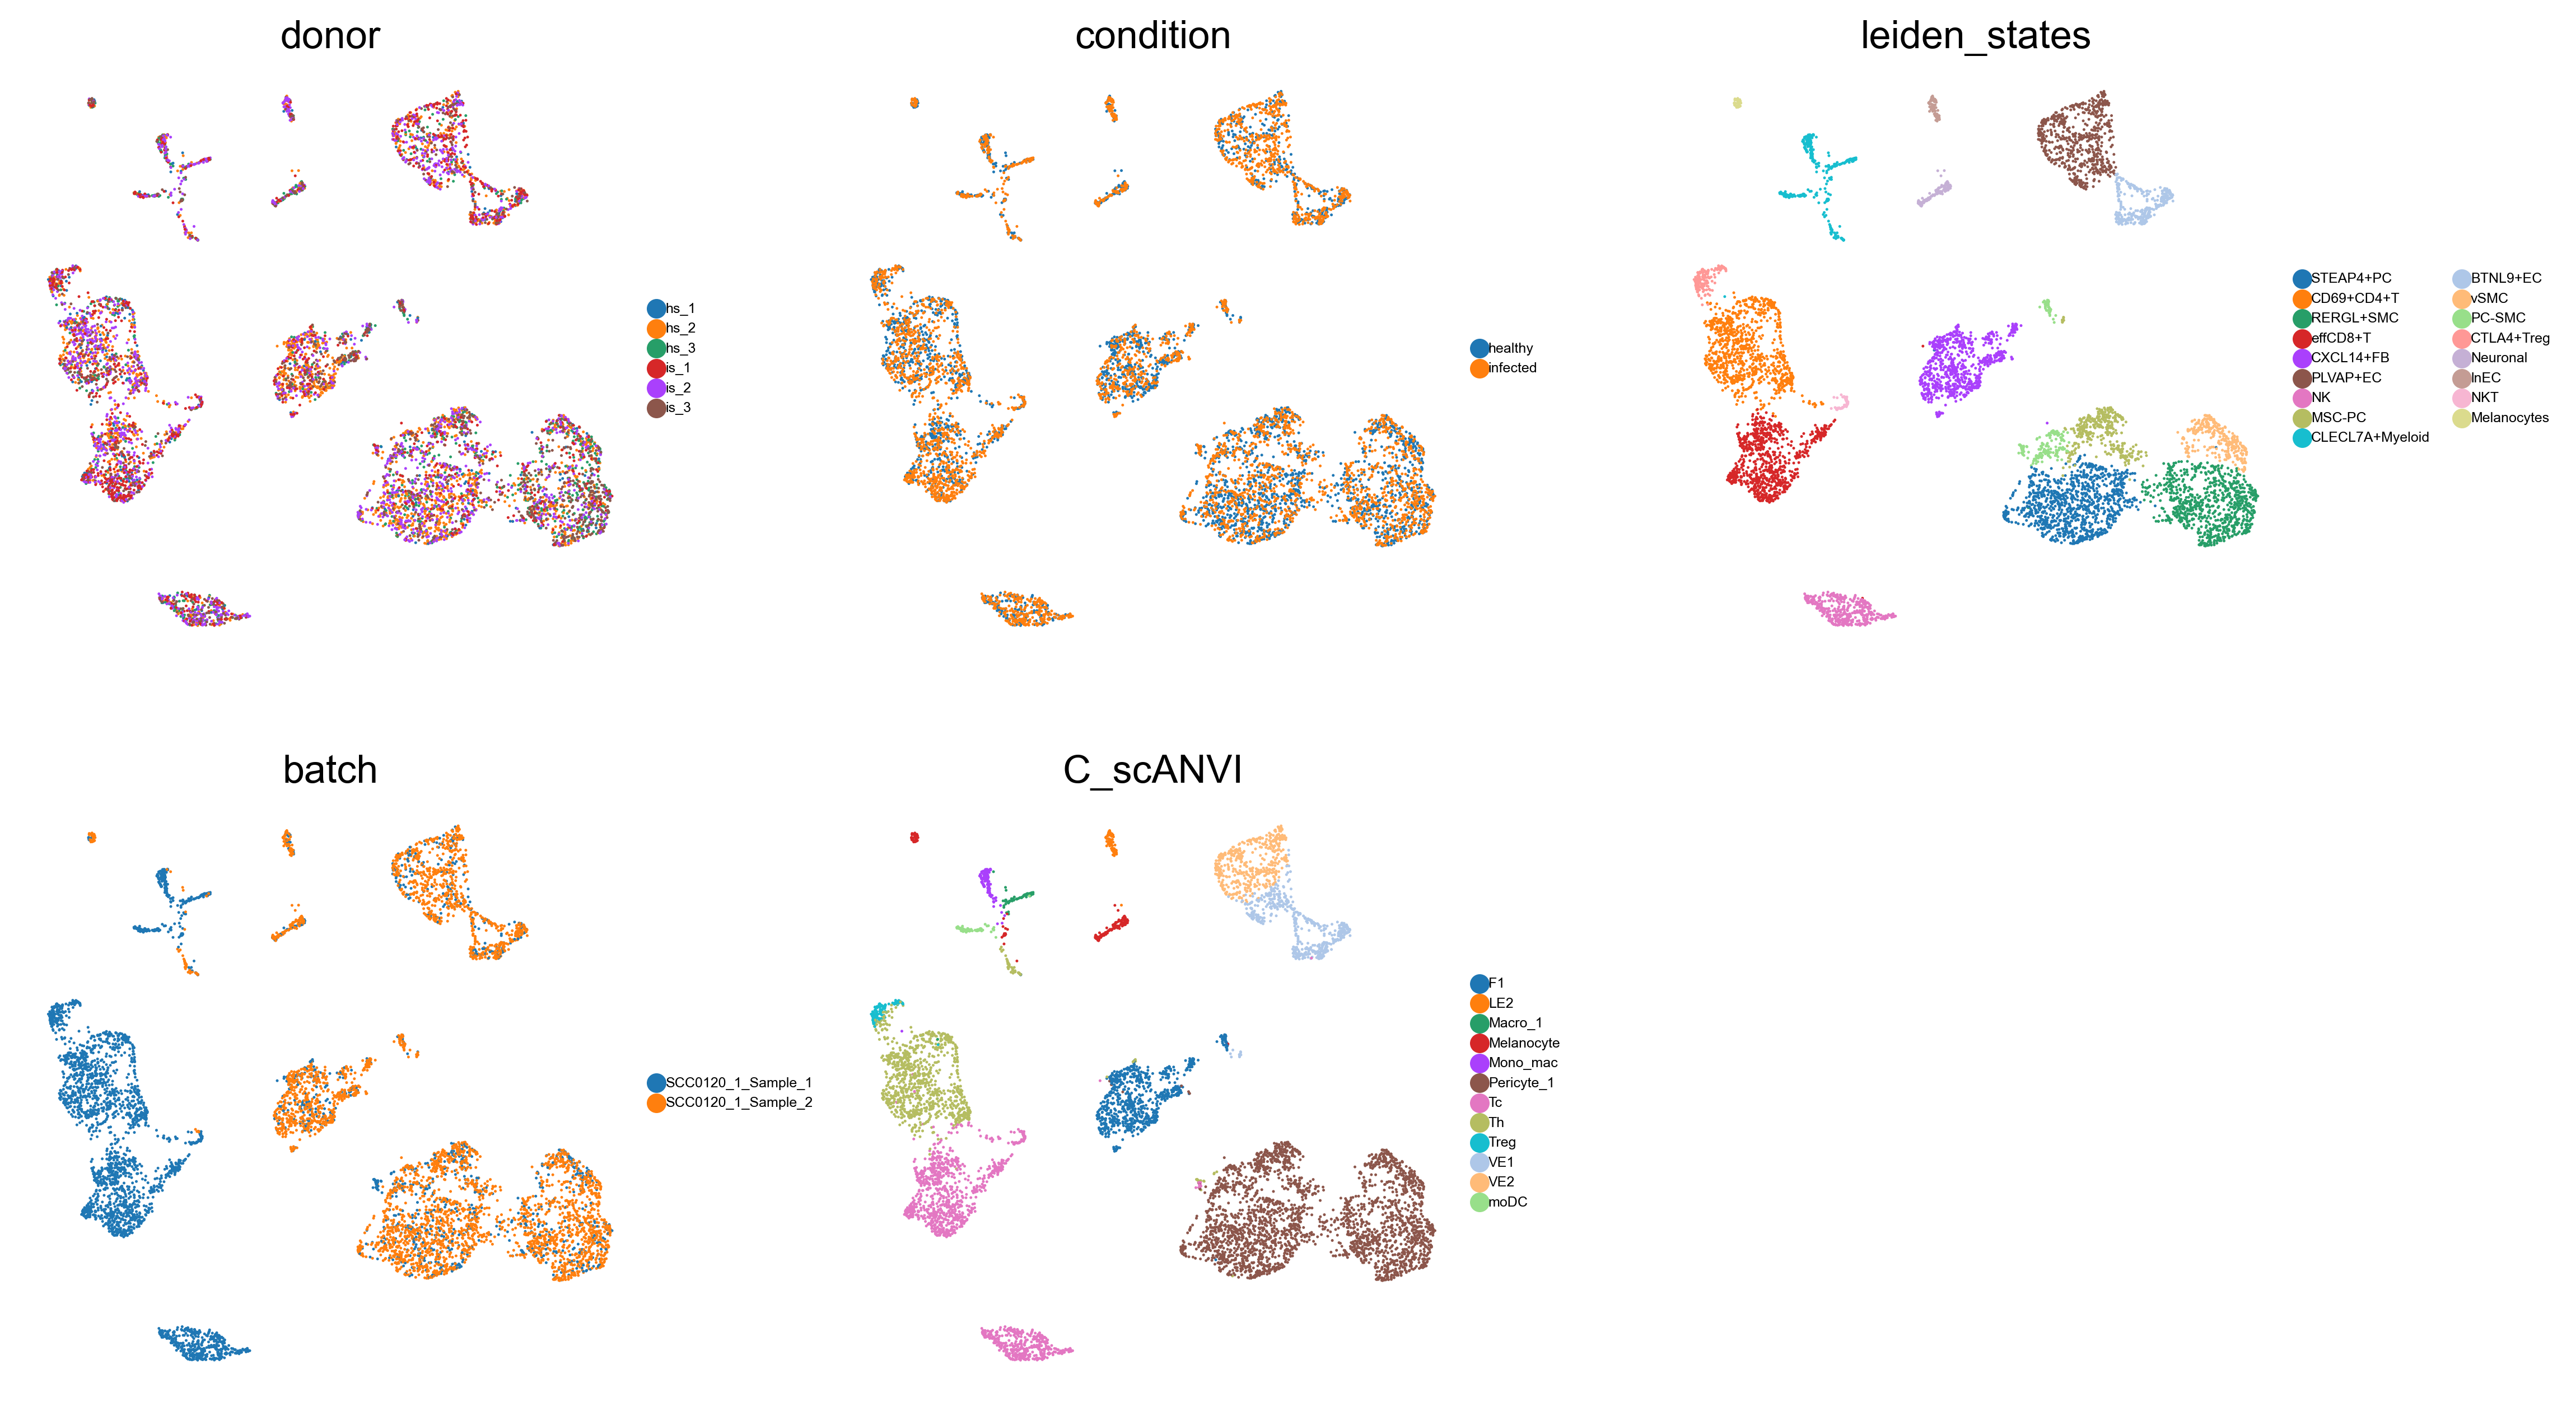

In [4]:
sc.pl.umap(adata_skin, frameon = False, color = ['donor', 'condition', 'leiden_states', 'batch', 'C_scANVI'], size = 4, legend_fontsize = 5, ncols = 3)

/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/cartalop/mambaforge/envs/scanpy/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


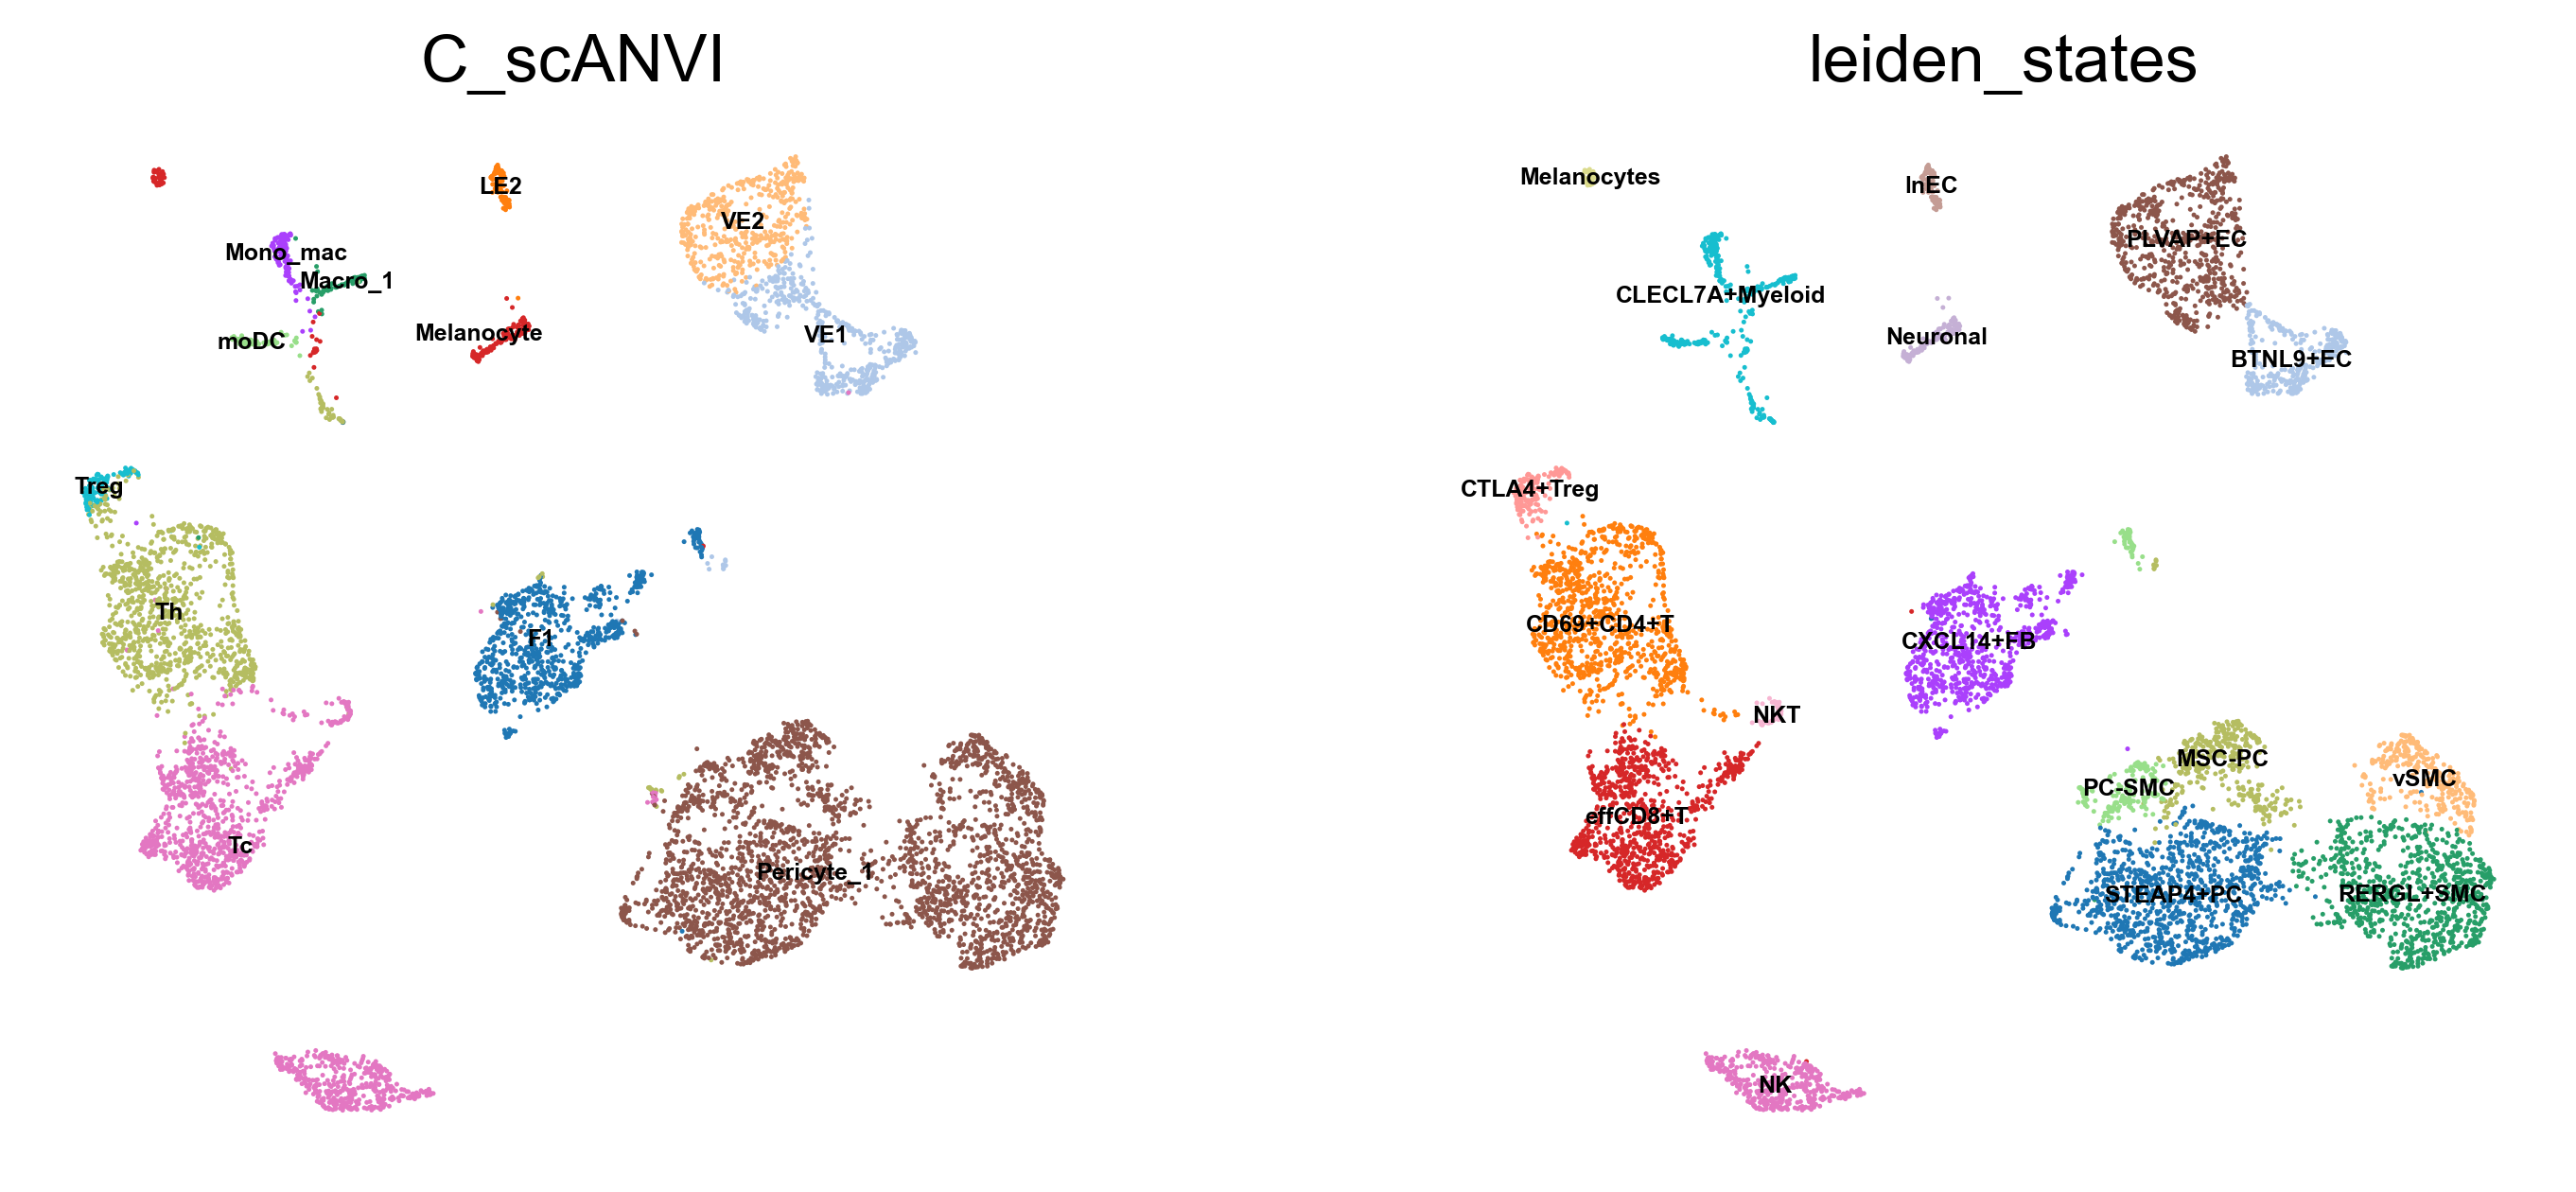

In [5]:
sc.pl.umap(adata_skin, frameon = False, color = ['C_scANVI', 'leiden_states'], size = 4, legend_fontsize = 5, ncols = 3, legend_loc = 'on data')

### Calculate marker genes 

In [ ]:
adata_log = anndata.AnnData(X = adata_skin.X,  var = adata_skin.var, obs = adata_skin.obs, obsm = adata_skin.obsm)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)
adata_log.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(adata_log, inplace = False)["X"]
)

### Visualise cellular proportions

In [ ]:
adata_log.obs['leiden_states'].cat.categories

In [ ]:
ax1 = pd.crosstab(adata_log.obs['condition'], adata_log.obs['leiden_states']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (10,6), fontsize = 12, grid = False)
horiz_offset = 1.03
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 2)

In [ ]:
ax1 = pd.crosstab(adata_log.obs['donor'], adata_log.obs['leiden_states']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (10,6), fontsize = 12, grid = False)
horiz_offset = 1.03
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 2)

In [ ]:
data = pd.crosstab(adata_log.obs['condition'], adata_log.obs['leiden_states'])
totals = data.sum(axis = 1)
percent = data.div(totals, axis = 0).mul(100).round(2)

ax1 = percent.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (16,8), fontsize = 10, grid = False, width = 0.6)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

for c in ax1.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax1.bar_label(c, labels = labels, label_type = 'center', padding = 1, color = 'black', rotation = 270, fontsize = 6)

In [ ]:
data = pd.crosstab(adata_log.obs['donor'], adata_log.obs['leiden_states'])
totals = data.sum(axis = 1)
percent = data.div(totals, axis = 0).mul(100).round(2)

ax1 = percent.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (16,8), fontsize = 10, grid = False, width = 0.6)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

for c in ax1.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax1.bar_label(c, labels = labels, label_type = 'center', padding = 1, color = 'black', rotation = 270, fontsize = 6)

In [ ]:
ax1 = pd.crosstab(adata_log.obs['leiden_states'], adata_log.obs['condition']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (8,6), fontsize = 10, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 3)

### Compute marker genes

In [ ]:
markers = ['PDGFRB', 'NOTCH3', 'MYH11', 'RGS5', 'FABP4', 'CD36', 'TAGLN', 'ACTA2', 'CNN1', 'ACTG2', 'CSPG4', 'RERGL']
sc.pl.stacked_violin(adata_log, markers, groupby = 'leiden_states', dendrogram = True, cmap = 'RdPu', layer = 'sqrt_norm')

In [ ]:
sc.tl.rank_genes_groups(adata_log, 'leiden_states', method = 'wilcoxon', n_genes = 100, use_raw = False)
sc.pl.rank_genes_groups_dotplot(adata_log, n_genes = 5, cmap = 'RdPu')

In [ ]:
sc.pl.rank_genes_groups_stacked_violin(adata_log, n_genes = 5, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'infection', dendrogram = True, cmap = 'RdPu')

In [ ]:
markers = ['TWIST1', 'FOXC2', 'SNAI1', 'VIM', 'FGFR1', 'FN1']
sc.pl.stacked_violin(adata_log, markers, groupby = 'leiden_states', dendrogram = True, cmap = 'RdPu')

### Calculate expression scores

- KEGG Influenza A signature

In [ ]:
kegg = KEGG()
pathway = kegg.get('hsa05164')
genes = kegg.parse(pathway)

gene_list = [desc.split(';')[0] for desc in genes['GENE'].values()]
gene_list

In [ ]:
sc.tl.score_genes(BrEpit_ALL, gene_list, score_name = 'KEGG-IAV_Score', use_raw = False)
adata_log.obs['KEGG-IAV_Score'] = BrEpit_ALL.obs['KEGG-IAV_Score'].copy()
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KEGG-IAV_Score'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

- KEGG Interferon alpha

In [ ]:
kegg = KEGG()
pathway = kegg.get('hsa04630')
genes = kegg.parse(pathway)

gene_list = [desc.split(';')[0] for desc in genes['GENE'].values()]
gene_list

In [ ]:
sc.tl.score_genes(BrEpit_ALL, gene_list, score_name = 'IFNab_Score', use_raw = False)
adata_log.obs['IFNab_Score'] = BrEpit_ALL.obs['IFNab_Score'].copy()
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KEGG-IAV_Score', 'IFNab_Score'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

- KEGG interferon gamma

In [ ]:
kegg = KEGG()
pathway = kegg.get('hsa04622')
genes = kegg.parse(pathway)

gene_list = [desc.split(';')[0] for desc in genes['GENE'].values()]
gene_list

In [ ]:
sc.tl.score_genes(BrEpit_ALL, gene_list, score_name = 'IFNg_Score', use_raw = False)
adata_log.obs['IFNg_Score'] = BrEpit_ALL.obs['IFNg_Score'].copy()
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KEGG-IAV_Score', 'IFNab_Score', 'IFNg_Score'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

- KEGG IL-1

In [ ]:
kegg = KEGG()
pathway = kegg.get('hsa04668')
genes = kegg.parse(pathway)

gene_list = [desc.split(';')[0] for desc in genes['GENE'].values()]
gene_list

In [ ]:
sc.tl.score_genes(BrEpit_ALL, gene_list, score_name = 'IL1_Score', use_raw = False)
adata_log.obs['IL1_Score'] = BrEpit_ALL.obs['IL1_Score'].copy()
sc.pl.umap(adata_log, frameon = False, color = ['leiden_states', 'IAV_score', 'KEGG-IAV_Score', 'IFNab_Score', 'IFNg_Score', 'IL1_Score'], size = 0.5, legend_fontsize = 5, ncols = 3, legend_loc = 'on data', layer = 'sqrt_norm', cmap = 'magma')

### Calculate cluster-specific marker genes using _Wilcoxon's Rank Sum Test_

In [ ]:
sc.tl.rank_genes_groups(adata_log, 'leiden_states', method = 'wilcoxon', n_genes = 100, use_raw = False)
result = adata_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

### Visualise marker genes

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata_log, n_genes = 5, cmap = 'magma')

### Calculate marker genes per condition

- Split dataset by condition

In [ ]:
healthy_ctrl_log = adata_log[adata_log.obs['group'].isin(['healthy_ctrl'])]
healthy_ctrl_log 

In [ ]:
sc.tl.rank_genes_groups(healthy_ctrl_log, 'leiden_states', method = 'wilcoxon', n_genes = healthy_ctrl_log.shape[1], use_raw = False)
result = healthy_ctrl_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
sc.pl.rank_genes_groups_dotplot(healthy_ctrl_log, n_genes = 5, values_to_plot = 'scores', cmap = 'coolwarm')

In [ ]:
sc.pl.rank_genes_groups_dotplot(healthy_ctrl_log, n_genes = 5, values_to_plot = 'logfoldchanges', cmap = 'coolwarm')

In [ ]:
healthy_iav_log = adata_log[adata_log.obs['group'].isin(['healthy_iav'])]
healthy_iav_log 

In [ ]:
sc.tl.rank_genes_groups(healthy_iav_log, 'leiden_states', method = 'wilcoxon', n_genes = healthy_iav_log.shape[1], use_raw = False)
result = healthy_iav_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
sc.pl.rank_genes_groups_dotplot(healthy_iav_log, n_genes = 5, values_to_plot = 'scores', cmap = 'coolwarm')

In [ ]:
sc.pl.rank_genes_groups_dotplot(healthy_iav_log, n_genes = 5, values_to_plot = 'logfoldchanges', cmap = 'coolwarm')

In [ ]:
copd_ctrl_log = adata_log[adata_log.obs['group'].isin(['copd_ctrl'])]
copd_ctrl_log 

In [ ]:
sc.tl.rank_genes_groups(copd_ctrl_log, 'leiden_states', method = 'wilcoxon', n_genes = healthy_iav_log.shape[1], use_raw = False)
result = copd_ctrl_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
sc.pl.rank_genes_groups_dotplot(copd_ctrl_log, n_genes = 5, values_to_plot = 'scores', cmap = 'coolwarm')

In [ ]:
sc.pl.rank_genes_groups_dotplot(copd_ctrl_log, n_genes = 5, values_to_plot = 'logfoldchanges', cmap = 'coolwarm')

In [ ]:
copd_iav_log = adata_log[adata_log.obs['group'].isin(['copd_iav'])]
copd_iav_log 

In [ ]:
sc.tl.rank_genes_groups(copd_iav_log, 'leiden_states', method = 'wilcoxon', n_genes = healthy_iav_log.shape[1], use_raw = False)
result = copd_iav_log.uns['rank_genes_groups']
groups = result['names'].dtype.names
wilcox_markers = pd.DataFrame(
{group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names','logfoldchanges', 'pvals_adj']})
wilcox_markers.head(10)

In [ ]:
sc.pl.rank_genes_groups_dotplot(copd_iav_log, n_genes = 5, values_to_plot = 'scores', cmap = 'coolwarm')

In [ ]:
sc.pl.rank_genes_groups_dotplot(copd_iav_log, n_genes = 5, values_to_plot = 'logfoldchanges', cmap = 'coolwarm')

### Export annotated object

In [ ]:
BrEpit_ALL

In [ ]:
sc.pl.umap(BrEpit_ALL, frameon = False, color = ['leiden_states', 'STEAP4', 'CEP55', 'FOXJ1', 'PIGR', 'SERPINE2', 'ADM2', 'WNT10A'], size = 1, legend_fontsize = 5, ncols = 4, legend_loc = 'on data')